## __*Atividade Avalitiva 02 - Parte 2*__

Considerando o conjunto de dados Credit Approval Data Set:
1. Explorar visualmente e numericamente os dados;
2. Preparar os conjunto de dados utilizando as técnicas ensinadas na disciplina, quando pertinente;
3. Para cada técnica de preparação de dados aplicada, avaliar os algorimos K-NN, LogisticRegression, SVM,  Árvore de descisão, RandomForest e um outro algoritmo que deverá ser escolhido pelo aluno;
4. Utilizar gráficos e tabelas para apresentar as métricas obtidas (em treino e em teste), e escolher o melhor modelo com base em uma das métricas apresentadas. Justificar a escolha da métrica com base no sistema em questão;
5. Enviar a URL do jupyter notebook no GitHub.
____________________

## __Identificação do problema__

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. 

Este dataset trata-se de aplicaçãoes para liberação de cartão de crédito, baseado em algumas características de consumo, emprego e renda de alguns clientes. 

A tarefa a ser desempenhada pelo algoritmo deve ser a de que, à partir da entrada dos padrões de consumo, renda, dentre outras de um suposto cliente, o algoritmo deve decidir se o cliente tem direito ou não a um cartão de crédito.
________________________

## *Passo 1 - Setup do projeto*
#### Importação das bibliotecas e identificação do endereço de download do dataset.

In [1]:
import os
import urllib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(f'Matplot version: {matplotlib.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')
print(f'Seaborn version: {sns.__version__}')

CRX_ROOT = 'http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/'
CRX_URL = CRX_ROOT + 'crx.data' 

DATA_PATH = os.path.join('..', 'data', 'raw')
DATA_FILE = 'crx.csv'
CRX_DATA = os.path.join(DATA_PATH, DATA_FILE)

RANDOM_STATE = 42

print('\nConfiguração completa !')

Matplot version: 3.3.2
Numpy version: 1.19.2
Pandas version: 1.2.1
Scikit-learn version: 0.23.2
Seaborn version: 0.11.1

Configuração completa !


__________________________________
## *Passo 2 - Download e Carregamento dos Dados*
#### Download do dataset e carregamento do mesmo para um DataFrame.

In [2]:
def download_data(data_url, data_path, data_file):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)
    
download_data(CRX_URL, DATA_PATH, DATA_FILE)

In [3]:
col_names = ['gender', 'age', 'debt', 'married', 'bank_customer', 'education_level', 'ethnicity', 'years_employed',
             'prior_default', 'employed', 'credit_score', 'drivers_license', 'citizen', 'zip_code', 'income', 'approved']

In [4]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    return pd.read_csv(local_path, header=None, names=col_names)

crx_df = load_data(DATA_PATH, DATA_FILE)

_____________________
## *Passo 3 - Análise Exploratória de Dados*
#### Análise dos dados buscando identificar dados inválidos e faltantes. Nessa etapa os dados serão transformados e normalizados, caso haja necessidade.

In [5]:
print(f'O dataframe crx_df possui {crx_df.shape[0]} linhas e {crx_df.shape[1]} colunas.')

O dataframe crx_df possui 690 linhas e 16 colunas.


In [6]:
crx_df.head(10)

,gender,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,drivers_license,citizen,zip_code,income,approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [7]:
crx_df.tail(20)

,gender,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,drivers_license,citizen,zip_code,income,approved
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [8]:
crx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           690 non-null    object 
 1   age              690 non-null    object 
 2   debt             690 non-null    float64
 3   married          690 non-null    object 
 4   bank_customer    690 non-null    object 
 5   education_level  690 non-null    object 
 6   ethnicity        690 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  drivers_license  690 non-null    object 
 12  citizen          690 non-null    object 
 13  zip_code         690 non-null    object 
 14  income           690 non-null    int64  
 15  approved         690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


### _O DataFrame não possui dados ausentes, mas possui alguns campos sem informação, identificados com '?'._
________________

In [9]:
crx_df = crx_df.drop(['drivers_license'], axis=1)
crx_df = crx_df.drop(['zip_code'], axis=1)
crx_df

,gender,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,citizen,income,approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


### _Julgou-se que os dados de CEP e se o cliente possui ou nao carteira de motorista nao sao relevantes no processo de análise de credito e por isso foram eliminados do DataFrame._
________________

In [10]:
crx_df.describe()

,debt,years_employed,credit_score,income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


### _Os dados das features possuem valores com amplitudes muito distantes entre si. Dessa forma, os mesmos deverão ser normalizados._
___________

In [11]:
crx_df['approved'].value_counts()

-    383
+    307
Name: approved, dtype: int64

### _As classes não estão com valores equilibrados. Assim sendo, a feature class, para treinamento e teste, deverá ser estratificada._
___________

### </br> Substituição das informações ausentes. Para os campos numéricos, será aplicada a média da feature. Para os valores categóricos, será escolhido o mais frequente na coluna.

In [12]:
crx_df['gender'].unique()

array(['b', 'a', '?'], dtype=object)

In [13]:
crx_df['gender'].value_counts()

b    468
a    210
?     12
Name: gender, dtype: int64

In [14]:
val_ausentes = (crx_df[['gender', 'age', 'debt', 'married', 'bank_customer', 'education_level', 'ethnicity', 
                        'years_employed', 'prior_default', 'employed', 'credit_score', 'citizen', 'income', 'approved']] == '?').sum()

print(f'Quantidade de dados ausentes: \n{val_ausentes}')

Quantidade de dados ausentes: 
gender             12
age                12
debt                0
married             6
bank_customer       6
education_level     9
ethnicity           9
years_employed      0
prior_default       0
employed            0
credit_score        0
citizen             0
income              0
approved            0
dtype: int64


In [15]:
crx_df[['gender', 'age', 'married', 'bank_customer', 'education_level', 'ethnicity']] = crx_df[['gender', 
        'age', 'married', 'bank_customer', 'education_level', 'ethnicity']].replace('?', np.nan)

crx_df.isnull().sum()

gender             12
age                12
debt                0
married             6
bank_customer       6
education_level     9
ethnicity           9
years_employed      0
prior_default       0
employed            0
credit_score        0
citizen             0
income              0
approved            0
dtype: int64

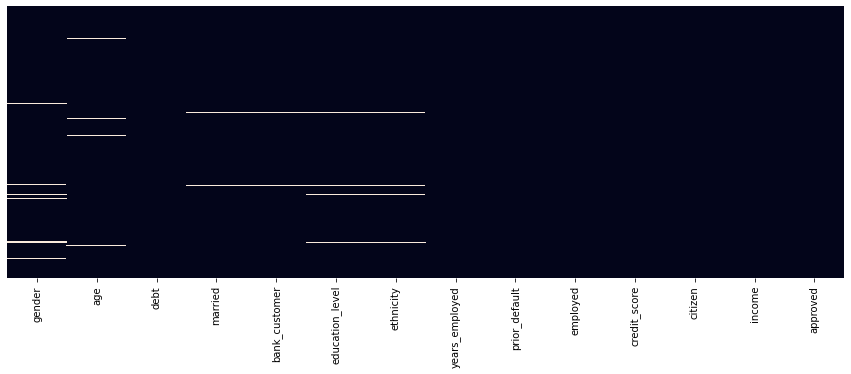

In [16]:
plt.figure(figsize=(15, 5))
_ = sns.heatmap(crx_df.isnull(), yticklabels=False, cbar=False)

In [17]:
crx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           678 non-null    object 
 1   age              678 non-null    object 
 2   debt             690 non-null    float64
 3   married          684 non-null    object 
 4   bank_customer    684 non-null    object 
 5   education_level  681 non-null    object 
 6   ethnicity        681 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  citizen          690 non-null    object 
 12  income           690 non-null    int64  
 13  approved         690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


In [18]:
crx_df['age'] = crx_df['age'].astype(float)
crx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           678 non-null    object 
 1   age              678 non-null    float64
 2   debt             690 non-null    float64
 3   married          684 non-null    object 
 4   bank_customer    684 non-null    object 
 5   education_level  681 non-null    object 
 6   ethnicity        681 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  citizen          690 non-null    object 
 12  income           690 non-null    int64  
 13  approved         690 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 75.6+ KB


In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
crx_df[['age']] = imputer.fit_transform(crx_df[['age']].values)

In [20]:
crx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           678 non-null    object 
 1   age              690 non-null    float64
 2   debt             690 non-null    float64
 3   married          684 non-null    object 
 4   bank_customer    684 non-null    object 
 5   education_level  681 non-null    object 
 6   ethnicity        681 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  citizen          690 non-null    object 
 12  income           690 non-null    int64  
 13  approved         690 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 75.6+ KB


In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
crx_df[['gender', 'married', 'bank_customer', 'education_level', 'ethnicity']] = imputer.fit_transform(crx_df[['gender', 
        'married', 'bank_customer', 'education_level', 'ethnicity']].values)

crx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           690 non-null    object 
 1   age              690 non-null    float64
 2   debt             690 non-null    float64
 3   married          690 non-null    object 
 4   bank_customer    690 non-null    object 
 5   education_level  690 non-null    object 
 6   ethnicity        690 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  citizen          690 non-null    object 
 12  income           690 non-null    int64  
 13  approved         690 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 75.6+ KB


_____________
### Transformacao das features categoricas para numericas para aplicacao no algoritmo.

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in crx_df.columns:
    if crx_df[column].dtype == 'object':
        crx_df[column] = le.fit_transform(crx_df[column])
        
crx_df

,gender,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,citizen,income,approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,750,1


_____________
### Normalização das escalas das *features* para aplicação no algoritmo.

In [23]:
from sklearn.preprocessing import MinMaxScaler

X = crx_df.drop(['approved'], axis=1)
y = crx_df['approved']

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns

X_scaled

,gender,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,citizen,income
0,1.0,0.256842,0.000000,0.5,0.0,0.923077,0.875,0.043860,1.0,1.0,0.014925,0.0,0.00000
1,0.0,0.675489,0.159286,0.5,0.0,0.769231,0.375,0.106667,1.0,1.0,0.089552,0.0,0.00560
2,0.0,0.161654,0.017857,0.5,0.0,0.769231,0.375,0.052632,1.0,0.0,0.000000,0.0,0.00824
3,1.0,0.211729,0.055000,0.5,0.0,0.923077,0.875,0.131579,1.0,1.0,0.074627,0.0,0.00003
4,1.0,0.096541,0.200893,0.5,0.0,0.923077,0.875,0.060000,1.0,0.0,0.000000,1.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.110226,0.360179,1.0,1.0,0.307692,0.375,0.043860,0.0,0.0,0.000000,0.0,0.00000
686,0.0,0.134135,0.026786,0.5,0.0,0.076923,0.875,0.070175,0.0,1.0,0.029851,0.0,0.00394
687,0.0,0.172932,0.482143,1.0,1.0,0.384615,0.250,0.070175,0.0,1.0,0.014925,0.0,0.00001
688,1.0,0.062707,0.007321,0.5,0.0,0.000000,0.875,0.001404,0.0,0.0,0.000000,0.0,0.00750


_____________
## *Passo 4 - Treinamento do Modelo*
#### Nessa etapa, os dados serão divididos em sets de treinamento e teste e aplicados nos algoritmos de Machine Learning, sendo escolhidos alguns ajustes para os hiperparâmetros mais importantes, no qual o Cross Validation selecionará os mais efetivos.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, stratify=y, random_state=RANDOM_STATE)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (483, 13)
y_train shape: (483,)
X_test shape: (207, 13)
y_test shape: (207,)


In [25]:
print('y_train size: ')
print(y_train.value_counts())

print('\ny_test size: ')
print(y_test.value_counts())

y_train size: 
1    268
0    215
Name: approved, dtype: int64

y_test size: 
1    115
0     92
Name: approved, dtype: int64


________
### _Importação das bibliotecas adicionais dos demais algoritmos._
### _Além dos algoritmos já estipulados, foi-se optado também pelo Classificador Naive-Bayes. Dentre os modelos disponíveis para este algoritmo, foi-se escolhido o Gaussian Naive-Bayes, por ser de utilização geral e multi-classe._

In [26]:
# Novos pacotes adicionados
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB

In [27]:
def build_classifiers():
    """
    Retorna uma lista com os classificadores que serão avaliados.
    """
    classifiers = []
    classifiers.append(
                      ('knn',                              # nome do classificador
                        KNeighborsClassifier(),            # instancia do classificador
                        {'n_neighbors' : range(1, 33, 2)}  # hiperparametros
                      )
    )

    classifiers.append(
                      ('lr',                               # nome do classificador
                        LogisticRegression(max_iter=1000), # instancia do classificador
                        {'penalty' : ['l2'],
                         #'max_iter' : [100, 200, 500, 1000],
                         'C' : [100, 10, 1, 0.1, 0.01]
                        }  # hiperparametros
                      )
    )
    
    classifiers.append(
                      ('svm',
                        SVC(),
                        {'kernel' : ['linear', 'rbf'], 
                         'C' : [2 ** (-5), 1, 2 ** 5, 2 ** 10],
                         'gamma' : [2 ** (-15), 2 ** (-10), 2 ** (-5), 1, 2 ** 5]
                        }
                      )
    )
    
    classifiers.append(
                      ('dt',
                        DecisionTreeClassifier(),
                        {'max_depth' : [2, 4, 6, 8, 10, 12]}
                      )  
    )
    
    classifiers.append(
                      ('rf',
                        RandomForestClassifier(),
                        {'n_estimators' : [10, 50, 100]}
                      ) 
    )
    
    classifiers.append(
                      ('gnb',
                        GaussianNB(),
                        {'var_smoothing' : [1e-07, 1e-08, 1e-09, 1e-10]}
                      ) 
    )
    return classifiers

In [28]:
classifiers = build_classifiers()
results = []
names = []

for name, model, parameters in classifiers:
    print('\n>> classifier name: {}'.format(name))
    gs = GridSearchCV(estimator=model, param_grid=parameters, refit=True, verbose=0)
    gs.fit(X_train, y_train)
    kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    cv = cross_val_score(gs, X_train, y_train, cv=kf, scoring='accuracy')
    print(f'Mean: {cv.mean():.4f}, Standart Deviation: {cv.std():.4f}')
    print(f'Melhor resultado com {gs.best_params_} foi de {gs.best_score_:.4f}')

    results.append(cv)
    names.append(name)
    # TODO: guardar a estatistica de teste para plotar um grafico de barras.
    
    if name == 'knn':
        y_pred_knn = gs.predict(X_test)
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'lr':
        y_pred_lr = gs.predict(X_test)       
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'svm':
        y_pred_svm = gs.predict(X_test)
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'dt':
        y_pred_dt = gs.predict(X_test)
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'rf':
        y_pred_rf = gs.predict(X_test)        
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')
    elif name == 'gnb':
        y_pred_gnb = gs.predict(X_test)        
        acuracia = gs.score(X_test, y_test)
        print(f'Acuracia do modelo {name}: {acuracia:.3f}')


>> classifier name: knn
Mean: 0.8777, Standart Deviation: 0.0293
Melhor resultado com {'n_neighbors': 5} foi de 0.8883
Acuracia do modelo knn: 0.831

>> classifier name: lr
Mean: 0.8798, Standart Deviation: 0.0255
Melhor resultado com {'C': 0.1, 'penalty': 'l2'} foi de 0.8779
Acuracia do modelo lr: 0.826

>> classifier name: svm
Mean: 0.8798, Standart Deviation: 0.0271
Melhor resultado com {'C': 1, 'gamma': 1, 'kernel': 'rbf'} foi de 0.8799
Acuracia do modelo svm: 0.831

>> classifier name: dt
Mean: 0.8592, Standart Deviation: 0.0253
Melhor resultado com {'max_depth': 4} foi de 0.8654
Acuracia do modelo dt: 0.821

>> classifier name: rf
Mean: 0.8861, Standart Deviation: 0.0273
Melhor resultado com {'n_estimators': 100} foi de 0.8882
Acuracia do modelo rf: 0.845

>> classifier name: gnb
Mean: 0.8074, Standart Deviation: 0.0285
Melhor resultado com {'var_smoothing': 1e-07} foi de 0.8157
Acuracia do modelo gnb: 0.792


__________
### _Matrizes de confusão para comparação e análise dos resultados_

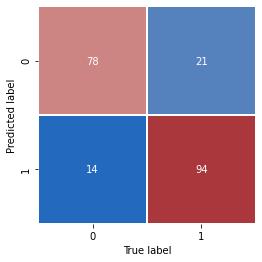

In [40]:
cm = confusion_matrix(y_test, y_pred_knn)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=50)
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

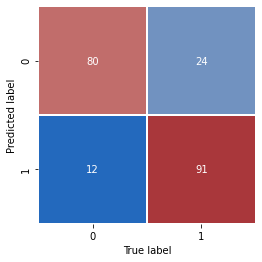

In [38]:
cm = confusion_matrix(y_test, y_pred_lr)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=50)
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

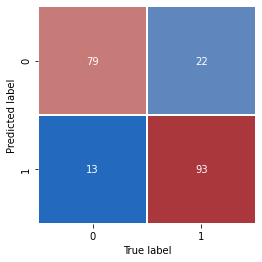

In [39]:
cm = confusion_matrix(y_test, y_pred_svm)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=50)
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

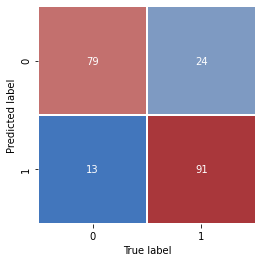

In [32]:
cm = confusion_matrix(y_test, y_pred_dt)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=50)
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

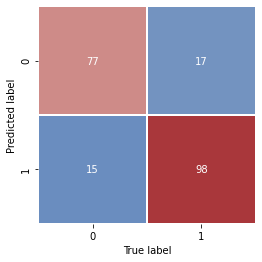

In [33]:
cm = confusion_matrix(y_test, y_pred_rf)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=50)
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

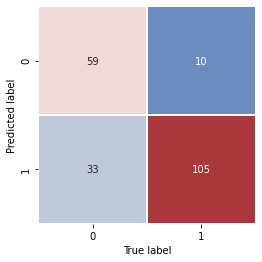

In [34]:
cm = confusion_matrix(y_test, y_pred_gnb)
_ = sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, linewidths=0.3, cmap='vlag', center=50)
_ = plt.xlabel('True label')
_ = plt.ylabel('Predicted label')

__________
### _Análise dos resultados da Precisão, Revocação e F1-Score_

In [35]:
print('Precisão, revocação e F1-score:')
print('\n--------------------- Modelo kNN --------------------')
print(classification_report(y_test, y_pred_knn))
print('\n---------------------- Modelo LR --------------------')
print(classification_report(y_test, y_pred_lr))
print('\n--------------------- Modelo SVM --------------------')
print(classification_report(y_test, y_pred_svm))
print('\n---------------------- Modelo DT --------------------')
print(classification_report(y_test, y_pred_dt))
print('\n---------------------- Modelo RF --------------------')
print(classification_report(y_test, y_pred_rf))
print('\n---------------------- Modelo GNB --------------------')
print(classification_report(y_test, y_pred_gnb))

Precisão, revocação e F1-score:

--------------------- Modelo kNN --------------------
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        92
           1       0.87      0.82      0.84       115

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207


---------------------- Modelo LR --------------------
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        92
           1       0.88      0.79      0.83       115

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207


--------------------- Modelo SVM --------------------
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        92
           1       0.88      0.81      0

__________
### _Boxplots das medidas adquiridas durante o treinamento de cada algoritmo._

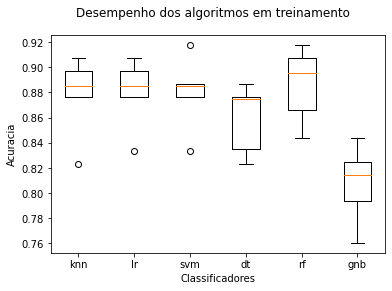

In [36]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho dos algoritmos em treinamento')
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_xlabel('Classificadores')
ax.set_ylabel('Acuracia')
plt.show()

## __*Resultado:*__

### Baseado nos resultados, foi-se escolhido o algoritmo *__Random Forest__*. Adotou-se como critério para a seleção do modelo, a acurácia do mesmo e mais precisamente a não oferta de um cartão para um cliente sem perfil para tal, característica dada pela precisão (habilidade do classificador não classificar como positiva uma amostra que é negativa). O algoritmo Naive-Bayes teve mais acertos que o Random Forest no que se trata de liberar o crédito quando o cliente possui perfil compatível. Porém, ele liberou muito mais cartões para clientes sem perfil que o Random Forest, o que representa um maior risco de inadimplência para a instituição.